In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"/content/training_set.csv")

In [5]:
df.drop("Unnamed: 0", axis =1 , inplace = True)
df.shape

(3910, 58)

In [6]:
df.head(10)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.00,0.56,0.00,0.56,0.00,0.00,0.00,0.00,0.00,0.56,3.38,0.00,1.12,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.56,0.0,0.0,0.00,0.000,0.083,0.000,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.10,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.70,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.00,0.00,0.00,1.29,0.00,0.00,0.00,1.29,0.64,0.00,1.93,0.00,2.58,0.0,0.64,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.00,0.00,0.00,0.00,0.00,0.58,0.00,0.58,0.58,0.58,0.58,0.00,1.74,0.0,0.00,1.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.239,0.239,0.000,3.338,123,207,1
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.08,0.00,1.08,0.0,0.00,0.00,0.00,0.00,1.08,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.000,0.000,0.000,1.263,4,24,0
6,0.14,0.14,0.29,0.00,0.00,0.00,0.00,0.00,1.02,0.29,0.14,0.58,0.00,0.00,0.00,0.00,0.00,0.14,2.35,0.14,1.02,0.0,0.00,0.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.29,0.0,0.00,0.00,0.0,0.00,0.0,0.14,0.0,0.0,0.00,0.000,0.204,0.000,0.153,0.153,0.102,2.705,73,368,1
7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.91,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.22,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.45,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,16.7,0.0,0.00,0.000,0.066,0.000,0.000,0.000,0.000,2.284,19,329,0
8,0.00,0.00,0.19,0.00,0.19,0.19,0.00,0.00,0.00,0.19,0.00,0.38,0.00,0.00,0.00,0.00,0.00,0.38,1.54,0.00,0.96,0.0,0.00,0.00,2.69,1.54,0.77,0.57,0.19,1.15,0.19,0.19,0.0,0.19,0.57,0.38,0.38,0.00,0.0,0.19,0.38,0.0,0.38,0.0,0.38,0.0,0.0,0.19,0.026,0.404,0.053,0.026,0.000,0.000,2.894,45,411,0
9,0.00,2.66,0.00,0.00,2.00,0.00,0.00,0.66,0.00,0.00,0.00,2.00,1.33,0.00,0.66,0.00,0.00,6.66,3.33,0.00,1.33,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.000,0.000,0.000,0.111,0.000,0.000,2.133,7,32,1


# Spliting Dataset

Splitting the training dataset and validation dataset in 4:1 ratio for performance evaluation. 

As the dataset is slightly imbalaced, stratified split is used to have same distribution of classes in train and validation dataset

In [7]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :57]
Y = df[["Y"]]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123, stratify = Y)


In [9]:
x_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
1700,0.0,0.44,0.0,0.0,0.44,0.0,0.0,0.0,0.0,0.44,0.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.44,0.0,0.0,8.81,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4.367,0.000,0.0,0.074,0.0,0.592,7.288,43,328
3776,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.00,7.69,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,1.000,1,7
2345,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1.49,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,2.23,0.74,0.00,0.0,0.0,0.74,0.0,0.0,0.00,0.0,0.0,0.0,1.49,0.0,1.49,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.0,0.000,4.000,45,140
2064,0.0,0.00,0.0,0.0,0.68,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.34,0.00,0.0,0.0,0.00,0.0,0.0,1.37,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.0,0.0,0.000,0.143,0.0,0.000,0.0,0.000,1.784,18,141
561,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,3.37,0.0,0.0,0.00,2.24,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.0,0.218,0.0,0.000,1.827,11,53


In [10]:
y_train.head()

,Y
1700,0
3776,0
2345,0
2064,0
561,1


# Feature Selection

Here, in the given dataset independent variables are continuous and dependent variable is categorical. Hence we can use Anova F-score to determine the best features depending on the F score where higher F score denotes higher importance.

In [11]:
from sklearn.feature_selection import SelectKBest, f_classif
# f_classif calculate Anova f score for the feature

selector = SelectKBest(score_func= f_classif, k= 25) # To select to 25 features
selector.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(k=25)

In [21]:
top_features = pd.Series(selector.scores_ , index = x_train.iloc[:, :57].columns).sort_values(ascending = False)

print(f"Average of F- Scores of the Features is {top_features.mean():.2f}") # Average F score
print(f"No. of Features with F scores more than average = {top_features[top_features >= top_features.mean()].count()}")


Average of F- Scores of the Features is 112.90
No. of Features with F scores more than average = 23


Text(0, 0.5, 'F- Scores')

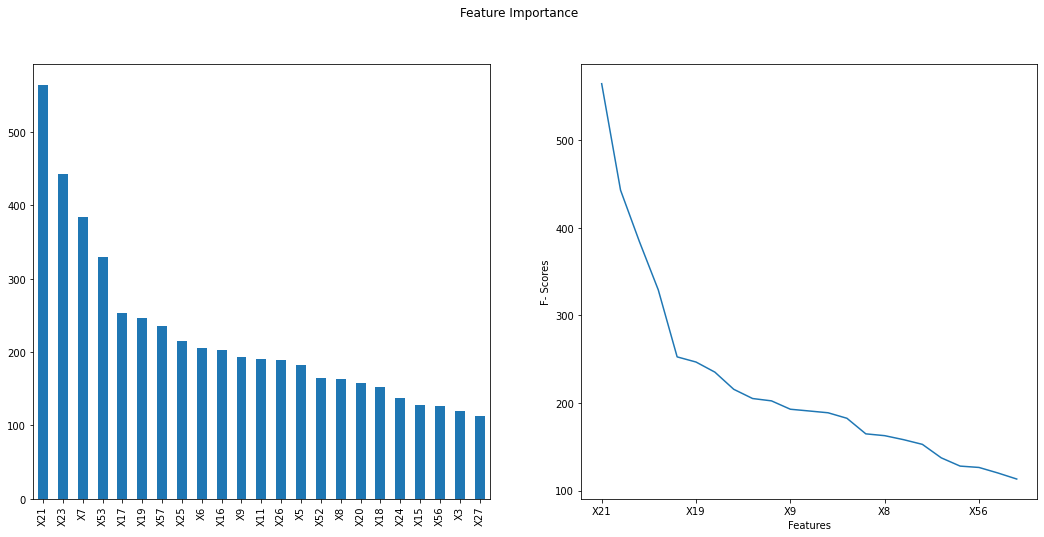

In [22]:
# plotting the F scores to identify the important Features

fig, axs = plt.subplots(1, 2, figsize=(18, 8))
top_features[top_features >= top_features.mean()].plot.bar(ax = axs[0])
top_features[top_features >= top_features.mean()].plot(ax = axs[1])
fig.suptitle('Feature Importance')
plt.xlabel('Features')
plt.ylabel('F- Scores')

So the top 25 important columns are selected for model building.

In [23]:
top_cols = selector.get_support(indices = True)
top_cols

array([ 2,  4,  5,  6,  7,  8, 10, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24,
       25, 26, 29, 36, 51, 52, 55, 56])

Only those important columns are selected in x_train and x_test and the remaining features are removed

In [24]:
x_train = x_train.iloc[:, top_cols]
x_test = x_test.iloc[:, top_cols]

In [25]:
x_train.head()

,X3,X5,X6,X7,X8,X9,X11,X15,X16,X17,X18,X19,X20,X21,X23,X24,X25,X26,X27,X30,X37,X52,X53,X56,X57
1700,0.0,0.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.44,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.074,0.0,43,328
3776,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,7.69,0.00,0.00,0.000,0.0,1,7
2345,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,2.23,0.74,0.00,0.74,1.49,0.000,0.0,45,140
2064,0.0,0.68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.34,0.00,0.00,0.00,0.000,0.0,18,141
561,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.37,0.0,0.0,2.24,0.0,0.00,0.00,0.00,0.00,0.00,0.218,0.0,11,53


In [26]:
x_test.head()

,X3,X5,X6,X7,X8,X9,X11,X15,X16,X17,X18,X19,X20,X21,X23,X24,X25,X26,X27,X30,X37,X52,X53,X56,X57
1382,0.00,0.00,0.00,0.0,2.53,0.0,0.00,0.00,0.0,1.26,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.186,0.186,23,84
1997,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,1.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.070,0.000,43,356
3581,0.00,0.68,0.00,0.0,0.00,0.0,0.00,0.68,0.0,0.00,0.0,0.68,0.00,0.00,0.00,0.00,2.72,2.72,2.04,0.68,0.68,0.000,0.000,12,123
3576,0.24,1.63,0.49,0.0,0.00,0.0,0.08,0.00,0.0,0.32,0.0,3.68,0.32,0.65,1.14,0.08,0.00,0.00,0.00,0.00,0.00,0.000,0.232,10,333
674,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.684,0.000,7,16
